# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.025503e+01     7.315232e+00
 * time: 0.004247903823852539
     1     2.676939e+01     4.565447e+00
 * time: 0.012315034866333008
     2     1.866280e+01     5.294694e+00
 * time: 0.03163003921508789
     3     1.649792e+01     4.043792e+00
 * time: 0.050789833068847656
     4     1.168495e+01     1.300644e+00
 * time: 0.07013297080993652
     5     1.125478e+01     1.618210e+00
 * time: 0.08546185493469238
     6     1.039103e+01     1.136556e+00
 * time: 0.10062003135681152
     7     9.936529e+00     1.058588e+00
 * time: 0.11591982841491699
     8     9.706957e+00     9.567296e-01
 * time: 0.13130784034729004
     9     9.674204e+00     1.604527e+00
 * time: 0.1428828239440918
    10     9.519322e+00     1.498999e+00
 * time: 0.15457701683044434
    11     9.499772e+00     2.952385e+00
 * time: 0.16628599166870117
    12     9.176370e+00     1.226559e+00
 * time: 0.1815938949584961
    13     9.083875e+00     1.961678e+00
 * time

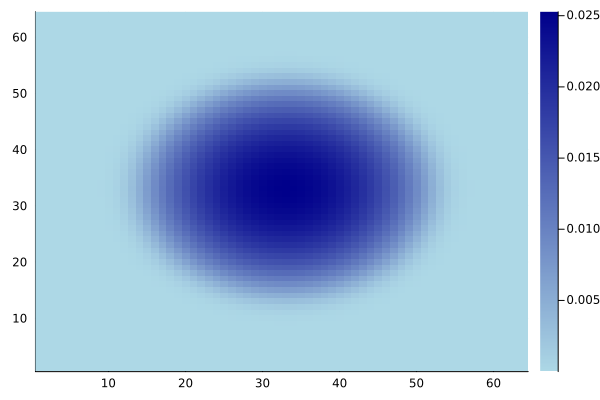

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)